GAN networks testing CNN's genarative

DCGAN - Popular GAN. dicriminator and generator use
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

PGGAN - Used for training high resolution
https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/

SRGAN - A GAN used for Upscalling resolution of images
https://www.kaggle.com/code/minawagihsmikhael/srgan-image-super-resolution-pytorch


Tensor Totorial - https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

_____________________________________________________________

Download the dataset first

In [ ]:
#Loading the data from the UCSD Large Dataset.
!kaggle datasets download -d mmazizi/ucsd-3-class-labeled-retinal-oct-images
!unzip ucsd-3-class-labeled-retinal-oct-images.zip

This is to check dataset size

In [ ]:
import os
from PIL import Image
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

def analyze_image_folder(folder_path):
    """Analyze a folder containing images and return statistics."""
    stats = {
        'total_images': 0,
        'total_size_bytes': 0,
        'formats': {},
        'dimensions': [],
        'file_sizes': [],
        'corrupted_files': []
    }

    # Walk through the directory
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_size = os.path.getsize(file_path)

            # Check if file is an image
            try:
                with Image.open(file_path) as img:
                    format = img.format.lower() if img.format else 'unknown'
                    width, height = img.size

                    # Update statistics
                    stats['total_images'] += 1
                    stats['total_size_bytes'] += file_size
                    stats['formats'][format] = stats['formats'].get(format, 0) + 1
                    stats['dimensions'].append((width, height))
                    stats['file_sizes'].append(file_size)
            except Exception as e:
                stats['corrupted_files'].append((file_path, str(e)))

    return stats

def format_size(size_bytes):
    """Convert bytes to human readable format."""
    for unit in ['B', 'KB', 'MB', 'GB']:
        if size_bytes < 1024:
            return f"{size_bytes:.2f} {unit}"
        size_bytes /= 1024
    return f"{size_bytes:.2f} TB"

def print_folder_stats(folder_path, stats):
    """Print formatted statistics for a folder."""
    print(f"\nAnalysis for folder: {folder_path}")
    print("-" * 50)
    print(f"Total images: {stats['total_images']}")
    print(f"Total folder size: {format_size(stats['total_size_bytes'])}")

    if stats['total_images'] > 0:
        print("\nImage formats:")
        for format, count in stats['formats'].items():
            print(f"  - {format}: {count} files")

        # Calculate average dimensions and size
        avg_width = sum(w for w, _ in stats['dimensions']) / len(stats['dimensions'])
        avg_height = sum(h for _, h in stats['dimensions']) / len(stats['dimensions'])
        avg_size = sum(stats['file_sizes']) / len(stats['file_sizes'])

        print(f"\nAverage image dimensions: {avg_width:.0f}x{avg_height:.0f}")
        print(f"Average file size: {format_size(avg_size)}")

        # Find dimension ranges
        min_dim = min((w * h) for w, h in stats['dimensions'])
        max_dim = max((w * h) for w, h in stats['dimensions'])
        print(f"Smallest image: {min_dim} pixels")
        print(f"Largest image: {max_dim} pixels")

    if stats['corrupted_files']:
        print("\nCorrupted or unreadable files:")
        for file_path, error in stats['corrupted_files']:
            print(f"  - {file_path}: {error}")

def main():
    # Get user input for folders to analyze
    print("Enter the paths of your image folders (one per line)")
    print("Press Enter twice when done:")

    folders = []
    while True:
        folder = input().strip()
        if not folder:
            break
        if os.path.exists(folder):
            folders.append(folder)
        else:
            print(f"Warning: Folder '{folder}' does not exist")

    # Analyze each folder
    for folder in folders:
        stats = analyze_image_folder(folder)
        print_folder_stats(folder, stats)

if __name__ == "__main__":
    main()

Installation of dependencies & setup seed

In [19]:
!pip freeze

certifi==2022.12.7
charset-normalizer==2.1.1
filelock==3.13.1
fsspec==2024.6.1
idna==3.4
Jinja2==3.1.4
MarkupSafe==2.1.5
mpmath==1.3.0
networkx==3.3
numpy==2.1.2
pillow==11.0.0
requests==2.28.1
sympy==1.13.1
typing_extensions==4.12.2
urllib3==1.26.13


In [1]:
import torch
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")
    # Try a simple CUDA operation
    x = torch.rand(5, 3).cuda()
    print("CUDA tensor created successfully:", x)

PyTorch Version: 2.6.0+cu118
CUDA Available: True
CUDA Device: NVIDIA RTX 5000 Ada Generation
CUDA tensor created successfully: tensor([[0.6723, 0.0201, 0.7105],
        [0.4420, 0.4082, 0.2407],
        [0.7130, 0.8761, 0.3904],
        [0.4319, 0.1753, 0.9138],
        [0.2233, 0.0279, 0.3010]], device='cuda:0')


In [ ]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [2]:
try:
  import argparse
except:
  print("Argparse not installed")
  print("Installing argparse . . .")
  %pip install argparse
  print("Installed argparse")

try:
  import os
except:
  print("OS not installed")
  print("Installing os . . .")
  %pip install os
  print("Installed os")

try:
  import random
except:
  print("Random not installed")
  print("Installing random . . .")
  %pip install random
  print("Installed random")

try:
  import torch
except:
  print("Torch not installed")
  print("Installing torch . . .")
  %pip install torch==1.13.1
  print("Installed torch")


try:
  import torch.nn as nn
except:
  print("Torch.nn not installed")
  print("Installing torch.nn . . .")
  %pip install torch.nn==1.13.1
  print("Installed torch.nn")

try:
  import torch.nn.parallel
except:
  print("Torch.nn.parallel not installed")
  %pip install torch.nn.parallel==1.13.1
  print("Installed torch.nn.parallel")

try:
  import torch.optim as optim
except:
  print("Torch.optim not installed")
  print("Installing torch.optim . . .")
  %pip install torch.optim==1.13.1
  print("Installed torch.optim")

try:
  import torch.utils.data
except:
  print("Torch.utils.data not installed")
  print("Installing torch.utils.data . . .")
  %pip install torch.utils.data==1.13.1
  print("Installed torch.utils.data")

try:
  import torchvision.datasets as dset
except:
  print("Torchvision.datasets not installed")
  print("Installing torchvision.datasets . . .")
  %pip install torchvision.datasets==0.14.1
  print("Installed torchvision.datasets")


try:
  import torchvision.transforms as transforms
except:
  print("Torchvision.transforms not installed")
  print("Installing torchvision.transforms . . .")
  %pip install torchvision.transforms==0.14.1
  print("Installed torchvision.transforms")

try:
  import torchvision.utils as vutils
except:
  print("Torchvision.utils not installed")
  print("Installing torchvision.utils . . .")
  %pip install torchvision.utils==0.14.1
  print("Installed torchvision.utils")

try:
  import numpy as np
except:
  print("Numpy not installed")
  print("Installing numpy . . .")
  %pip install numpy
  print("Installed numpy")

try:
  import matplotlib.pyplot as plt
except:
  print("Matplotlib not installed")
  print("Installing matplotlib . . .")
  %pip install matplotlib
  print("Installed matplotlib")

try:
  import matplotlib.animation as animation
except:
  print("Matplotlib.animation not installed")
  print("Installing matplotlib.animation . . .")
  %pip install matplotlib.animation
  print("Installed matplotlib.animation")

try:
  from IPython.display import HTML
except:
  print("IPython.display not installed")
  print("Installing IPython.display . . .")
  %pip install IPython.display
  print("Installed IPython.display")

try:
  from time import time
except:
  print("Time not installed")
  print("Installing time . . .")
  %pip install time
  print("Installed time")

try:
  import datetime
except:
  print("Datetime not installed")
  print("Installing datetime . . .")
  %pip install datetime
  print("Installed datetime")

try:
  import tqdm
except:
  print("tqdm not installed")
  print("Installing tqdm . . .")
  %pip install tqdm
  print("Installed tqdm")


try:
  import datetime
except:
  print("Datetime not installed")
  print("Installing datetime . . .")
  %pip install datetime
  print("Installed datetime")

try:
  import time
except:
  print("Time not installed")
  print("Installing time . . .")
  %pip install time
  print("Installed time")

try:
  import cv2
except:
  print("OpenCV not installed")
  print("Installing OpenCV . . .")
  %pip install opencv-python
  print("Installed OpenCV")


# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

Random Seed:  999


KeyboardInterrupt: 

Setup data variable for DCGAN

In [4]:
import torch

# Check PyTorch version
print(f"PyTorch Version: {torch.__version__}")

# Check CUDA availability
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    # Get current device properties
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
    print(f"Device memory (GB): {torch.cuda.get_device_properties(0).total_memory/1e9:.2f}")
    
    # Test CUDA with a simple operation
    x = torch.rand(5, 3)
    print("\nTesting CUDA with tensor operation:")
    print("Input tensor:", x)
    x = x.cuda()
    print("Tensor on GPU:", x)
else:
    print("\nNo CUDA device available. Please check your GPU drivers and CUDA installation.")

PyTorch Version: 2.6.0+cu118
CUDA Available: True
Current CUDA device: 0
Device name: NVIDIA RTX 5000 Ada Generation
Device memory (GB): 34.35

Testing CUDA with tensor operation:
Input tensor: tensor([[0.8756, 0.5581, 0.9467],
        [0.8487, 0.4041, 0.0147],
        [0.1965, 0.3037, 0.6297],
        [0.6932, 0.7603, 0.2755],
        [0.9288, 0.7632, 0.5297]])
Tensor on GPU: tensor([[0.8756, 0.5581, 0.9467],
        [0.8487, 0.4041, 0.0147],
        [0.1965, 0.3037, 0.6297],
        [0.6932, 0.7603, 0.2755],
        [0.9288, 0.7632, 0.5297]], device='cuda:0')


In [5]:
# Root directory for dataset
dataroot = r"C:\Users\dlons1\Downloads\archive\OCTUCSD-3class\OCTUCSD-3class\OCT\train"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 32

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 224

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
# Number of elements in the input vector
# Larger means generating more diverse data
# Larger also means higher cost to train
# Smaller vector means it is lower in cose
# But a lower vector also means less complex data output
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 50

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

This is to preprocess some images to get rid of white noise around the edges


In [6]:
print(dataroot)

C:\Users\dlons1\Downloads\archive\OCTUCSD-3class\OCTUCSD-3class\OCT\trainDrusen


In [7]:



def preprocess_oct_image(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convert white pixels to black
    img[img == 255] = 0


    ## Random spin of the image
    angle = random.randint(0, 360)  # Generate random angle between 0 and 360 degrees
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)  # Get rotation matrix
    img = cv2.warpAffine(img, M, (cols, rows))  # Apply rotation

    # Optional: Normalize the image
    cleaned_image = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

    # Convert white pixels to black again (in case normalization created new white pixels)
    cleaned_image[cleaned_image == 255] = 0

    return cleaned_image

def process_dataset(input_dir, output_dir):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Check if input directory exists
    if not os.path.exists(input_dir):
        print(f"Error: Input directory '{input_dir}' does not exist")
        return

    # Get all image files from input directory
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Print debugging information
    print(f"Looking for images in: {input_dir}")
    print(f"Found files: {os.listdir(input_dir)}")
    print(f"Found image files: {image_files}")

    for image_file in image_files:
        # Construct full input and output paths
        input_path = os.path.join(input_dir, image_file)
        output_path = os.path.join(output_dir, f"processed_{image_file}")

        # Process and save each image
        processed = preprocess_oct_image(input_path)
        cv2.imwrite(output_path, processed)

    print(f"Processed {len(image_files)} images")



# Example usage
input_directory = r"C:\Users\dlons1\Downloads\archive\OCTUCSD-3class\OCTUCSD-3class\OCT\trainDrusen\DRUSEN"
output_directory = "./content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrusenFix/DRUSEN/"
process_dataset(input_directory, output_directory)


Looking for images in: C:\Users\dlons1\Downloads\archive\OCTUCSD-3class\OCTUCSD-3class\OCT\trainDrusen\DRUSEN
Found files: ['DRUSEN-1001666-1.jpeg', 'DRUSEN-1001666-2.jpeg', 'DRUSEN-1001666-3.jpeg', 'DRUSEN-1001666-4.jpeg', 'DRUSEN-1001666-5.jpeg', 'DRUSEN-1001666-6.jpeg', 'DRUSEN-1001666-7.jpeg', 'DRUSEN-1001666-8.jpeg', 'DRUSEN-1001666-9.jpeg', 'DRUSEN-1001772-1.jpeg', 'DRUSEN-1001772-2.jpeg', 'DRUSEN-100580-1.jpeg', 'DRUSEN-1016042-1.jpeg', 'DRUSEN-1016042-2.jpeg', 'DRUSEN-1016042-3.jpeg', 'DRUSEN-1016042-4.jpeg', 'DRUSEN-1016042-5.jpeg', 'DRUSEN-1016042-6.jpeg', 'DRUSEN-1016042-7.jpeg', 'DRUSEN-1020679-1.jpeg', 'DRUSEN-1020679-2.jpeg', 'DRUSEN-1020679-3.jpeg', 'DRUSEN-1020679-4.jpeg', 'DRUSEN-1020679-5.jpeg', 'DRUSEN-1021530-1.jpeg', 'DRUSEN-1021530-2.jpeg', 'DRUSEN-103885-1.jpeg', 'DRUSEN-103885-2.jpeg', 'DRUSEN-103885-3.jpeg', 'DRUSEN-103885-4.jpeg', 'DRUSEN-103885-5.jpeg', 'DRUSEN-1042462-1.jpeg', 'DRUSEN-1046294-1.jpeg', 'DRUSEN-1046294-2.jpeg', 'DRUSEN-1046294-3.jpeg', 'DRUSEN

Transform dataset and load into dataloader

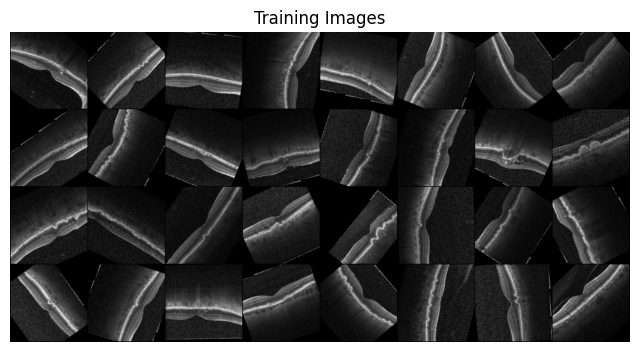

In [8]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataroot = "./content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrusenFix"


dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(num_output_channels=3), # make grayscale image 3 channel
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [9]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [27]:
import math
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu

        num_layers = int(math.log2(image_size)) - 2  # Subtract 2 because we start from 4x4

        layers = []
        in_channels = nz
        out_channels = ngf * 8  # Start with the highest number of feature maps

        # First layer (from latent vector to small feature map)
        layers.append(nn.ConvTranspose2d(in_channels, out_channels, 4, 1, 0, bias=False))
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU(True))

        # Middle layers (dynamically determined based on IMAGE_SIZE)
        for _ in range(num_layers):
            in_channels = out_channels
            out_channels = max(out_channels // 2, ngf // 4)  # Reduce features progressively
            layers.append(nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(True))

        # Final layer (output to image with NC channels)
        layers.append(nn.ConvTranspose2d(out_channels, nc, 4, 2, 1, bias=False))
        layers.append(nn.Tanh())

        self.main = nn.Sequential(*layers)

    def forward(self, input):
        return self.main(input)

In [10]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
           # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(ngf, ngf // 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf // 2),
            nn.ReLU(True),
            # state size. (ngf // 2) x 64 x 64
            nn.ConvTranspose2d(ngf // 2, ngf // 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf // 4),
            nn.ReLU(True),
            # state size. (ngf // 4) x 128 x 128
            nn.ConvTranspose2d(ngf // 4, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 224 x 224
        )

    def forward(self, input):
        return self.main(input)

In [11]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): BatchNorm2d(

In [12]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 224 x 224
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 112 x 112
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),  # Corrected in_channels
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 56 x 56
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 28 x 28
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 14 x 14
            nn.Conv2d(ndf * 8, ndf * 16, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 16),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*16) x 7 x 7
             nn.Conv2d(ndf * 16, 1, 4, 1, 0, bias=False),
            nn.Sigmoid(),
            nn.AdaptiveAvgPool2d(1)  # Add adaptive average pooling
        )

    def forward(self, input):
        output = self.main(input)
        return output.view(-1)

In [13]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (12): BatchNorm2d(1024, eps=1e-05

In [14]:
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

Load previous Genarative Models

In [ ]:

netG = Generator(ngpu).to(device)
netG.load_state_dict(torch.load('netG_1st.pth'))
netG.eval()

# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH, weights_only=True))
# model.eval()

In [ ]:
netD = Discriminator(ngpu).to(device)
netD.load_state_dict(torch.load('netD.pth'))
netD.eval()

Training loop

In [20]:
from tqdm import tqdm
import time
import datetime
import os
from PIL import Image

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

# Additional tracking variables
best_G_loss = float('inf')
worst_G_loss = float('-inf')
best_D_loss = float('inf')
worst_D_loss = float('-inf')
training_start_time = time.time()

# New tracking variables
D_real_accuracies = []  # Track how well D identifies real images
D_fake_accuracies = []  # Track how well D identifies fake images
G_success_rate = []     # Track how often G fools D
running_D_x_avg = []    # Running average of D(x)
running_D_G_z_avg = []  # Running average of D(G(z))
epoch_times = []        # Track time per epoch
memory_usage = []       # Track GPU memory usage if available

# Check if CUDA is available for GPU memory tracking
if torch.cuda.is_available():
    initial_memory = torch.cuda.memory_allocated()

print("Starting Training Loop...")
print(f"Training started at: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# For each epoch
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_D_x = []          # D(x) values for this epoch
    epoch_D_G_z = []        # D(G(z)) values for this epoch
    epoch_real_correct = 0   # Number of real images correctly identified
    epoch_fake_correct = 0   # Number of fake images correctly identified
    total_batches = 0

    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f'Epoch {epoch}/{num_epochs-1}',leave=True)

    # For each batch in the dataloader
    for i, data in pbar:

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        # Track D's performance on real images
        real_predictions = (output > 0.5).float()
        epoch_real_correct += (real_predictions == label).float().sum().item()
        epoch_D_x.append(D_x)

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Track D's performance on fake images
        fake_predictions = (output > 0.5).float()
        epoch_fake_correct += (fake_predictions == label).float().sum().item()
        epoch_D_G_z.append(D_G_z1)
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        # Track GPU memory if available
        if torch.cuda.is_available():
            memory_usage.append(torch.cuda.memory_allocated() - initial_memory)

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Update best/worst D loss
        current_D_loss = errD.item()
        best_D_loss = min(best_D_loss, current_D_loss)
        worst_D_loss = max(worst_D_loss, current_D_loss)

        # Update best/worst G loss
        current_G_loss = errG.item()
        best_G_loss = min(best_G_loss, current_G_loss)
        worst_G_loss = max(worst_G_loss, current_G_loss)

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1
        total_batches += b_size

    # End of epoch calculations
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    # Calculate epoch statistics
    d_real_accuracy = epoch_real_correct / (total_batches * 2)  # Divide by 2 because of real/fake batches
    d_fake_accuracy = epoch_fake_correct / (total_batches * 2)
    avg_D_x = np.mean(epoch_D_x)
    avg_D_G_z = np.mean(epoch_D_G_z)

    # Store running averages
    D_real_accuracies.append(d_real_accuracy)
    D_fake_accuracies.append(d_fake_accuracy)
    running_D_x_avg.append(avg_D_x)
    running_D_G_z_avg.append(avg_D_G_z)

    # Enhanced epoch logging
    print(f"\nEpoch {epoch} Statistics:")
    print(f"Time: {epoch_time:.2f} seconds")
    print(f"D Loss Range: {best_D_loss:.4f} (best) / {worst_D_loss:.4f} (worst)")
    print(f"G Loss Range: {best_G_loss:.4f} (best) / {worst_G_loss:.4f} (worst)")
    print(f"D Real Accuracy: {d_real_accuracy:.4f}")
    print(f"D Fake Accuracy: {d_fake_accuracy:.4f}")
    print(f"Avg D(x): {avg_D_x:.4f}")
    print(f"Avg D(G(z)): {avg_D_G_z:.4f}")
    if torch.cuda.is_available():
        print(f"GPU Memory Usage: {memory_usage[-1] / 1024**2:.2f} MB")
    print("-" * 80)

# Final training statistics
total_training_time = time.time() - training_start_time
hours = int(total_training_time // 3600)
minutes = int((total_training_time % 3600) // 60)
seconds = int(total_training_time % 60)

print("\nTraining completed!")
print(f"Total training time: {hours:02d}:{minutes:02d}:{seconds:02d}")
print(f"Average epoch time: {np.mean(epoch_times):.2f} seconds")
print("\nDiscriminator Statistics:")
print(f"Best D_loss: {best_D_loss:.4f}")
print(f"Worst D_loss: {worst_D_loss:.4f}")
print(f"Final D Real Accuracy: {D_real_accuracies[-1]:.4f}")
print(f"Final D Fake Accuracy: {D_fake_accuracies[-1]:.4f}")
print(f"Best D Real Accuracy: {max(D_real_accuracies):.4f}")
print(f"Best D Fake Accuracy: {max(D_fake_accuracies):.4f}")

print("\nGenerator Statistics:")
print(f"Best G_loss: {best_G_loss:.4f}")
print(f"Worst G_loss: {worst_G_loss:.4f}")
print(f"Final D(G(z)) Average: {running_D_G_z_avg[-1]:.4f}")
print(f"Best D(G(z)) Average: {max(running_D_G_z_avg):.4f}")

print(f"\nTotal iterations: {iters}")
if torch.cuda.is_available():
    print(f"Peak GPU Memory Usage: {max(memory_usage) / 1024**2:.2f} MB")


torch.save(netG.state_dict(), 'netG.pth')
torch.save(netD.state_dict(), 'netD.pth')

Starting Training Loop...
Training started at: 2025-04-15 17:21:58


Epoch 0/4:   1%|          | 3/270 [00:00<00:44,  6.04it/s]

[0/5][0/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 0/4:  20%|█▉        | 53/270 [00:03<00:12, 17.25it/s]

[0/5][50/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 0/4:  38%|███▊      | 103/270 [00:06<00:09, 17.25it/s]

[0/5][100/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 0/4:  57%|█████▋    | 153/270 [00:09<00:06, 17.42it/s]

[0/5][150/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 0/4:  75%|███████▌  | 203/270 [00:12<00:03, 17.40it/s]

[0/5][200/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 0/4:  94%|█████████▎| 253/270 [00:15<00:00, 17.41it/s]

[0/5][250/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 0/4: 100%|██████████| 270/270 [00:16<00:00, 16.61it/s]



Epoch 0 Statistics:
Time: 23.33 seconds
D Loss Range: 0.4463 (best) / 0.4463 (worst)
G Loss Range: 1.0216 (best) / 1.0217 (worst)
D Real Accuracy: 0.5000
D Fake Accuracy: 0.5000
Avg D(x): 1.0000
Avg D(G(z)): 0.3600
GPU Memory Usage: 37.51 MB
--------------------------------------------------------------------------------


Epoch 1/4:   1%|          | 3/270 [00:00<00:47,  5.66it/s]

[1/5][0/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 1/4:  20%|█▉        | 53/270 [00:03<00:12, 17.54it/s]

[1/5][50/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 1/4:  38%|███▊      | 103/270 [00:06<00:09, 17.41it/s]

[1/5][100/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 1/4:  57%|█████▋    | 153/270 [00:09<00:06, 17.51it/s]

[1/5][150/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 1/4:  75%|███████▌  | 203/270 [00:12<00:03, 17.44it/s]

[1/5][200/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 1/4:  94%|█████████▎| 253/270 [00:14<00:00, 17.38it/s]

[1/5][250/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 1/4: 100%|██████████| 270/270 [00:16<00:00, 16.67it/s]



Epoch 1 Statistics:
Time: 19.86 seconds
D Loss Range: 0.4463 (best) / 0.4466 (worst)
G Loss Range: 1.0213 (best) / 1.0217 (worst)
D Real Accuracy: 0.5000
D Fake Accuracy: 0.5000
Avg D(x): 1.0000
Avg D(G(z)): 0.3600
GPU Memory Usage: 37.51 MB
--------------------------------------------------------------------------------


Epoch 2/4:   1%|          | 3/270 [00:00<00:45,  5.89it/s]

[2/5][0/270]	Loss_D: 0.4463	Loss_G: 1.0216	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 2/4:  20%|█▉        | 53/270 [00:03<00:12, 17.46it/s]

[2/5][50/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 2/4:  38%|███▊      | 103/270 [00:06<00:09, 17.43it/s]

[2/5][100/270]	Loss_D: 0.4463	Loss_G: 1.0216	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 2/4:  57%|█████▋    | 153/270 [00:09<00:06, 17.37it/s]

[2/5][150/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 2/4:  75%|███████▌  | 203/270 [00:12<00:03, 17.38it/s]

[2/5][200/270]	Loss_D: 0.4463	Loss_G: 1.0216	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 2/4:  94%|█████████▎| 253/270 [00:14<00:00, 17.40it/s]

[2/5][250/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 2/4: 100%|██████████| 270/270 [00:16<00:00, 16.66it/s]



Epoch 2 Statistics:
Time: 19.80 seconds
D Loss Range: 0.4463 (best) / 0.4466 (worst)
G Loss Range: 1.0213 (best) / 1.0217 (worst)
D Real Accuracy: 0.5000
D Fake Accuracy: 0.5000
Avg D(x): 1.0000
Avg D(G(z)): 0.3600
GPU Memory Usage: 37.51 MB
--------------------------------------------------------------------------------


Epoch 3/4:   1%|          | 3/270 [00:00<00:33,  8.02it/s]

[3/5][0/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 3/4:  20%|█▉        | 53/270 [00:03<00:12, 17.36it/s]

[3/5][50/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 3/4:  38%|███▊      | 103/270 [00:06<00:09, 17.37it/s]

[3/5][100/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 3/4:  57%|█████▋    | 153/270 [00:09<00:06, 17.33it/s]

[3/5][150/270]	Loss_D: 0.4455	Loss_G: 1.0523	D(x): 1.0000	D(G(z)): 0.3595 / 0.3494


Epoch 3/4:  75%|███████▌  | 203/270 [00:12<00:03, 17.03it/s]

[3/5][200/270]	Loss_D: 0.4463	Loss_G: 1.0216	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 3/4:  94%|█████████▎| 253/270 [00:14<00:00, 17.16it/s]

[3/5][250/270]	Loss_D: 0.4463	Loss_G: 1.0216	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 3/4: 100%|██████████| 270/270 [00:16<00:00, 16.70it/s]



Epoch 3 Statistics:
Time: 19.74 seconds
D Loss Range: 0.4442 (best) / 0.4565 (worst)
G Loss Range: 1.0213 (best) / 1.1796 (worst)
D Real Accuracy: 0.5000
D Fake Accuracy: 0.5000
Avg D(x): 1.0000
Avg D(G(z)): 0.3600
GPU Memory Usage: 37.51 MB
--------------------------------------------------------------------------------


Epoch 4/4:   1%|          | 3/270 [00:00<00:36,  7.32it/s]

[4/5][0/270]	Loss_D: 0.4463	Loss_G: 1.0216	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 4/4:  20%|█▉        | 53/270 [00:03<00:12, 17.26it/s]

[4/5][50/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 4/4:  38%|███▊      | 103/270 [00:06<00:10, 16.57it/s]

[4/5][100/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 4/4:  57%|█████▋    | 153/270 [00:09<00:06, 17.22it/s]

[4/5][150/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 4/4:  75%|███████▌  | 203/270 [00:12<00:03, 17.10it/s]

[4/5][200/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 4/4:  94%|█████████▎| 253/270 [00:15<00:00, 17.19it/s]

[4/5][250/270]	Loss_D: 0.4463	Loss_G: 1.0217	D(x): 1.0000	D(G(z)): 0.3600 / 0.3600


Epoch 4/4: 100%|██████████| 270/270 [00:16<00:00, 16.48it/s]


Epoch 4 Statistics:
Time: 20.18 seconds
D Loss Range: 0.4442 (best) / 0.4565 (worst)
G Loss Range: 1.0213 (best) / 1.1796 (worst)
D Real Accuracy: 0.5000
D Fake Accuracy: 0.5000
Avg D(x): 1.0000
Avg D(G(z)): 0.3600
GPU Memory Usage: 37.51 MB
--------------------------------------------------------------------------------

Training completed!
Total training time: 00:01:42
Average epoch time: 20.58 seconds

Discriminator Statistics:
Best D_loss: 0.4442
Worst D_loss: 0.4565
Final D Real Accuracy: 0.5000
Final D Fake Accuracy: 0.5000
Best D Real Accuracy: 0.5000
Best D Fake Accuracy: 0.5000

Generator Statistics:
Best G_loss: 1.0213
Worst G_loss: 1.1796
Final D(G(z)) Average: 0.3600
Best D(G(z)) Average: 0.3600

Total iterations: 1350
Peak GPU Memory Usage: 164.64 MB


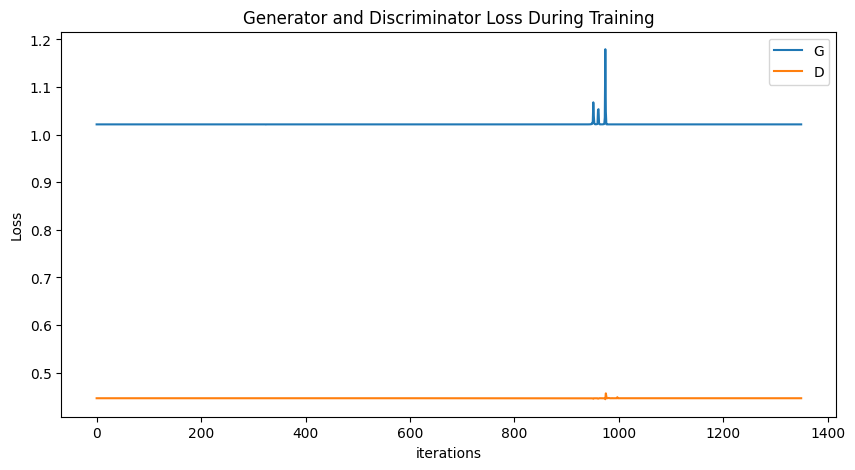

In [21]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


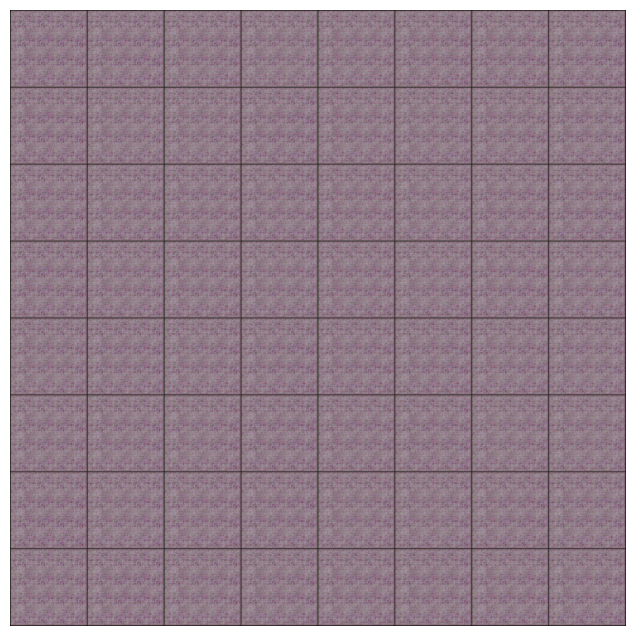

In [22]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())
ani.save('animation.gif', writer='imagemagick')

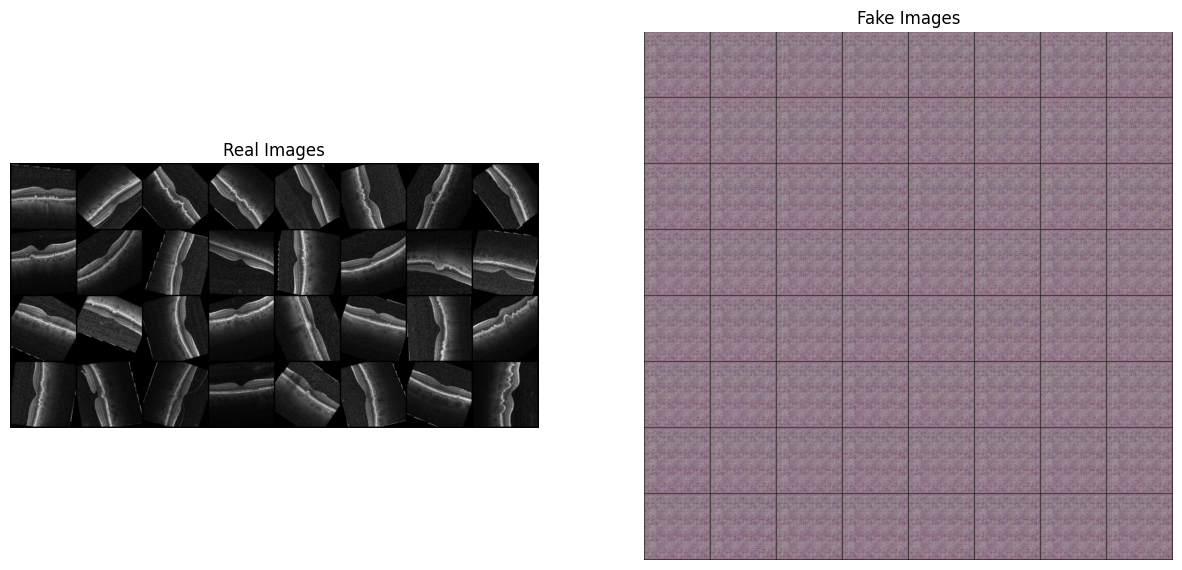

In [23]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [ ]:
# Directory to save images
save_dir = "fake_images"
os.makedirs(save_dir, exist_ok=True)

# Save each image separately
for i, img in enumerate(img_list):  # Assuming img_list contains PyTorch tensors
    img = img.detach().cpu().numpy()  # Convert tensor to NumPy array
    img = np.transpose(img, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    img = (img * 255).clip(0, 255).astype(np.uint8)  # Scale to 0-255 and ensure valid range
    img = Image.fromarray(img)
    img.save(f"{save_dir}/fake_image_{i}.png")

print(f"Saved {len(img_list)} images in '{save_dir}' directory.")



In [ ]:
import shutil

folder_path = "fake_images"  # Change this to your folder name
zip_filename = "fake_images.zip"

# Create a zip file
shutil.make_archive(zip_filename.replace(".zip", ""), 'zip', folder_path)

print(f"Zipped folder saved as {zip_filename}")
